In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In this notebook, we compute the maximal (resp. minimal) invariant set contained in the square with vertices $(\pm 1, \pm 1)$ for the system
$$\begin{align*}
x_{k+1} & = -y_k\\
y_{k+1} & =  x_k.
\end{align*}$$

The system is $x_{k+1} = Ax_k$ where
$$
A = \begin{bmatrix}
0 & -1\\
1 & 0
\end{bmatrix}.
$$
A set $S$ is controlled invariant if
$$AS \subseteq S.$$

In [2]:
using Polyhedra
h = HalfSpace([1, 0], 1.0) ∩ HalfSpace([-1, 0], 1) ∩ HalfSpace([0, 1], 1) ∩ HalfSpace([0, -1], 1)
□ = polyhedron(h);

In [3]:
using MosekTools
using SetProg
factory = with_optimizer(Mosek.Optimizer, LOG=0);

┌ Info: Recompiling stale cache file /home/blegat/.julia/compiled/v1.1/SetProg/aNaaR.ji for SetProg [fc078b4a-c1ae-5945-9d19-22107d1bf3e1]
└ @ Base loading.jl:1184


In [4]:
A = [0.0 -1.0
     1.0  0.0]

2×2 Array{Float64,2}:
 0.0  -1.0
 1.0   0.0

## Ellipsoids

In [5]:
model = Model(factory);
@variable(model, S, Ellipsoid(symmetric=true))
@constraint(model, S ⊆ □)
@constraint(model, A * S ⊆ S)
@objective(model, Max, nth_root(volume(S)))
@time JuMP.optimize!(model)
@show JuMP.termination_status(model)
@show JuMP.objective_value(model);
maximal = JuMP.value(S)

 21.292837 seconds (73.23 M allocations: 3.720 GiB, 8.68% gc time)
JuMP.termination_status(model) = OPTIMAL::TerminationStatusCode = 1
JuMP.objective_value(model) = 1.000000005470066


SetProg.Sets.Polar{Float64,SetProg.Sets.EllipsoidAtOrigin{Float64}}(SetProg.Sets.EllipsoidAtOrigin{Float64}([1.0 -3.89625e-22; -3.89625e-22 1.0]))

In [6]:
model = Model(factory);
@variable(model, S, Ellipsoid(symmetric=true))
@constraint(model, □ ⊆ S)
@constraint(model, A * S ⊆ S)
@objective(model, Min, nth_root(volume(S)))
@time JuMP.optimize!(model)
@show JuMP.termination_status(model)
@show JuMP.objective_value(model);
minimal = JuMP.value(S)

  9.646907 seconds (58.34 M allocations: 3.036 GiB, 12.39% gc time)
JuMP.termination_status(model) = OPTIMAL::TerminationStatusCode = 1
JuMP.objective_value(model) = 0.5000000005459557


SetProg.Sets.EllipsoidAtOrigin{Float64}([0.5 3.69965e-16; 3.69965e-16 0.5])

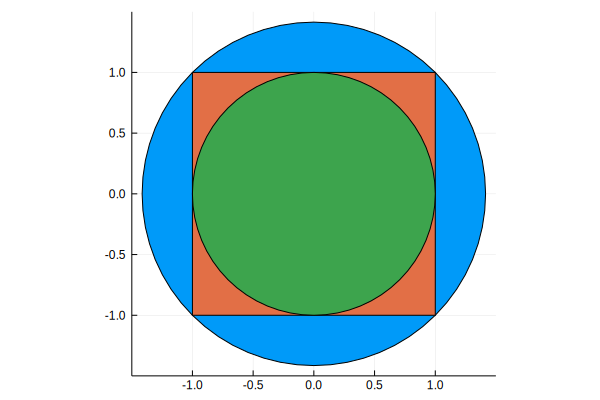

In [7]:
using Plots
plot(ratio=:equal)
plot!(minimal)
plot!(□)
plot!(maximal)

## Quartic

In [8]:
model = Model(factory);
@variable(model, S, PolySet(degree=4, convex=true, symmetric=true))
@constraint(model, S ⊆ □)
@constraint(model, A * S ⊆ S)
@objective(model, Max, nth_root(volume(S)))
@time JuMP.optimize!(model)
@show JuMP.termination_status(model)
@show JuMP.objective_value(model);
maximal_convex = JuMP.value(S)

 13.646685 seconds (32.49 M allocations: 1.599 GiB, 7.08% gc time)
JuMP.termination_status(model) = OPTIMAL::TerminationStatusCode = 1
JuMP.objective_value(model) = 6.44741927121497


SetProg.Sets.Polar{Float64,SetProg.Sets.ConvexPolynomialSublevelSetAtOrigin{Float64}}(SetProg.Sets.ConvexPolynomialSublevelSetAtOrigin{Float64}(4, SumOfSquares.GramMatrix{Float64,DynamicPolynomials.Monomial{true},DynamicPolynomials.MonomialVector{true}}([1.0 -8.17009e-19 -0.110515; -8.17009e-19 3.04958 8.17008e-19; -0.110515 8.17008e-19 1.0], DynamicPolynomials.Monomial{true}[x₁², x₁x₂, x₂²]), [12.0 1.04179e-18 -1.93134e-18 8.48532; 1.04179e-18 5.6571 2.82888 9.02894e-17; -1.93134e-18 2.82888 5.6571 1.57872e-16; 8.48532 9.02894e-17 1.57872e-16 12.0]))

In [9]:
model = Model(factory);
@variable(model, S, PolySet(degree=4, convex=true, symmetric=true))
@constraint(model, □ ⊆ S)
@constraint(model, A * S ⊆ S)
@objective(model, Min, nth_root(volume(S)))
@time JuMP.optimize!(model)
@show JuMP.termination_status(model)
@show JuMP.objective_value(model);
minimal_convex = JuMP.value(S)

  0.191278 seconds (278.72 k allocations: 14.386 MiB)
JuMP.termination_status(model) = OPTIMAL::TerminationStatusCode = 1
JuMP.objective_value(model) = 1.6118548964415274


SetProg.Sets.ConvexPolynomialSublevelSetAtOrigin{Float64}(4, SumOfSquares.GramMatrix{Float64,DynamicPolynomials.Monomial{true},DynamicPolynomials.MonomialVector{true}}([0.301775 2.25458e-15 -0.0783313; 2.25458e-15 0.553112 9.226e-15; -0.0783313 9.226e-15 0.301775], DynamicPolynomials.Monomial{true}[x₁², x₁x₂, x₂²]), [3.6213 2.73985e-14 2.73991e-14 1.50001; 2.73985e-14 0.792899 0.0857911 3.11343e-14; 2.73991e-14 0.0857911 0.792899 3.11313e-14; 1.50001 3.11343e-14 3.11313e-14 3.6213])

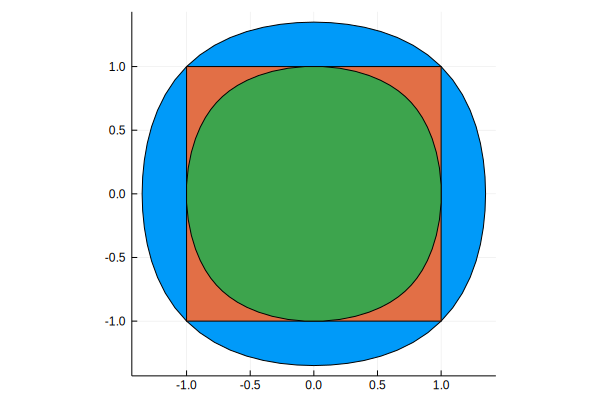

In [10]:
using Plots
plot(ratio=:equal)
plot!(minimal_convex)
#plot!(minimal_nonconvex)
plot!(□)
plot!(maximal_convex)